# EP1 MAC0417
**Nome:** Gabriela Victor

**NUSP:** 11795381

*Objetivo: Implementar biblioteca com a função de ler a base de dados criada anteriormente e visualizá-la em forma de uma tabela sumária de dados.*


Importação bibliotecas necessárias.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import matplotlib.image as mpimg
import pandas as pd
import os

Clonando o repositório do EP1 no github para ter acesso aos dados e metadados.

In [15]:
!git clone https://github.com/gabriela-vic/EP1


Cloning into 'EP1'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 128 (delta 6), reused 32 (delta 5), pack-reused 94
Receiving objects: 100% (128/128), 225.31 MiB | 34.54 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Updating files: 100% (110/110), done.


Mudando para o diretório de trabalho e exibindo conteúdo para fins de verificação.


In [18]:

!pwd
!ls


/content/EP1/EP1/EP1
001.jpg  012.jpg  023.jpg  034.jpg  045.jpg  056.jpg  067.jpg  078.jpg	089.jpg  100.jpg
002.jpg  013.jpg  024.jpg  035.jpg  046.jpg  057.jpg  068.jpg  079.jpg	090.jpg  101.jpg
003.jpg  014.jpg  025.jpg  036.jpg  047.jpg  058.jpg  069.jpg  080.jpg	091.jpg  102.jpg
004.jpg  015.jpg  026.jpg  037.jpg  048.jpg  059.jpg  070.jpg  081.jpg	092.jpg  103.jpg
005.jpg  016.jpg  027.jpg  038.jpg  049.jpg  060.jpg  071.jpg  082.jpg	093.jpg  104.jpg
006.jpg  017.jpg  028.jpg  039.jpg  050.jpg  061.jpg  072.jpg  083.jpg	094.jpg  105.jpg
007.jpg  018.jpg  029.jpg  040.jpg  051.jpg  062.jpg  073.jpg  084.jpg	095.jpg  106.jpg
008.jpg  019.jpg  030.jpg  041.jpg  052.jpg  063.jpg  074.jpg  085.jpg	096.jpg  107.jpg
009.jpg  020.jpg  031.jpg  042.jpg  053.jpg  064.jpg  075.jpg  086.jpg	097.jpg  108.jpg
010.jpg  021.jpg  032.jpg  043.jpg  054.jpg  065.jpg  076.jpg  087.jpg	098.jpg  metadadoEP1.csv
011.jpg  022.jpg  033.jpg  044.jpg  055.jpg  066.jpg  077.jpg  088.jpg	099.jpg


Armazenando arquivo de metadado em uma estrutura de dados df.
Visualizando a estrutura do arquivo csv.

In [19]:
df = pd.read_csv('metadadoEP1.csv')
print(df.head())



  filename  classe1 classe2 classe3    classe4    fundo  iluminação  \
0  001.jpg  perfume   colar   batom  bailarina  madeira   dia-claro   
1  002.jpg  perfume   colar   batom  bailarina  madeira   dia-claro   
2  003.jpg  perfume   colar   batom  bailarina  madeira   dia-claro   
3  004.jpg  perfume   colar   batom  bailarina  madeira  dia-escuro   
4  005.jpg  perfume   colar   batom  bailarina  madeira  dia-escuro   

  tamanho base    resolução  total imagens  
0     481,8 MB  3072 x 4096          108.0  
1          NaN          NaN            NaN  
2          NaN          NaN            NaN  
3          NaN          NaN            NaN  
4          NaN          NaN            NaN  


In [20]:
colunas_classes = ['classe1', 'classe2', 'classe3', 'classe4']
fotos_por_classe = {}                       # dicionário para organizar nomes das fotos por classe

for coluna in colunas_classes:
    for classe in df[coluna].unique():
        if classe not in fotos_por_classe:
            fotos_por_classe[classe] = []


for index, row in df.iterrows():
    nome_foto = row['filename']
    for coluna in colunas_classes:
        classe = row[coluna]
        if nome_foto not in fotos_por_classe[classe]:
            fotos_por_classe[classe].append(nome_foto)

# verificando se deu certo
for classe, fotos in fotos_por_classe.items():
    print(f"Classe '{classe}' tem as seguintes fotos: {fotos}")

Classe 'perfume' tem as seguintes fotos: ['001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpg', '006.jpg', '007.jpg', '008.jpg', '009.jpg', '010.jpg', '011.jpg', '012.jpg', '013.jpg', '014.jpg', '015.jpg', '016.jpg', '017.jpg', '018.jpg', '019.jpg', '020.jpg', '021.jpg', '022.jpg', '023.jpg', '024.jpg', '025.jpg', '026.jpg', '027.jpg', '028.jpg', '029.jpg', '030.jpg', '031.jpg', '032.jpg', '033.jpg', '034.jpg', '035.jpg', '036.jpg']
Classe 'garrafa' tem as seguintes fotos: ['037.jpg', '038.jpg', '039.jpg', '040.jpg', '041.jpg', '042.jpg', '043.jpg', '044.jpg', '045.jpg', '046.jpg', '047.jpg', '048.jpg', '049.jpg', '050.jpg', '051.jpg', '052.jpg', '053.jpg', '054.jpg', '055.jpg', '056.jpg', '057.jpg', '058.jpg', '059.jpg', '060.jpg', '061.jpg', '062.jpg', '063.jpg', '064.jpg', '065.jpg', '066.jpg', '067.jpg', '068.jpg', '069.jpg', '070.jpg', '071.jpg', '072.jpg']
Classe 'caneta' tem as seguintes fotos: ['073.jpg', '074.jpg', '075.jpg', '076.jpg', '077.jpg', '078.jpg', '079.jpg', '080.j

Visualização das classes (5 por classe)

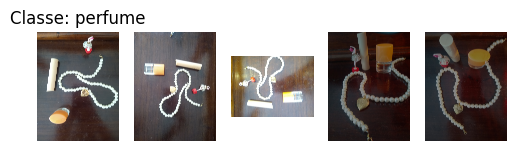

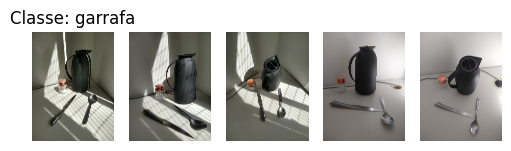

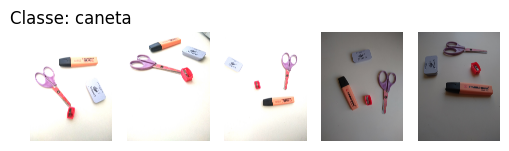

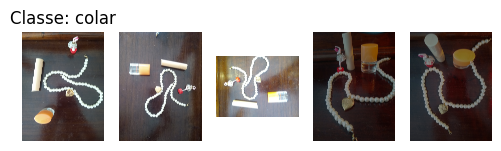

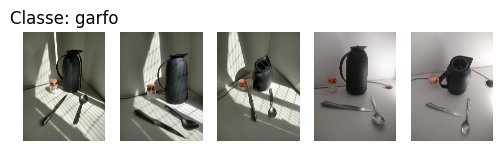

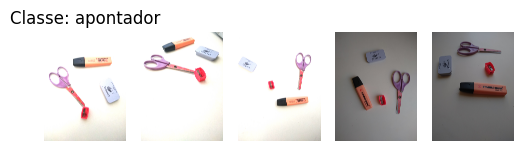

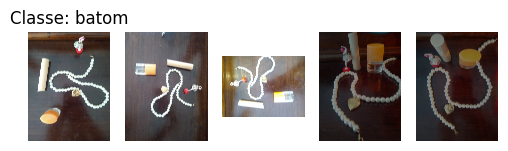

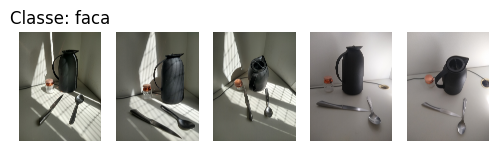

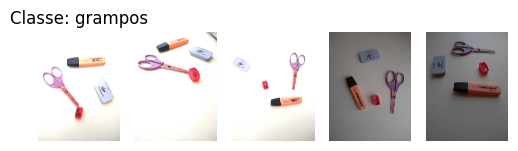

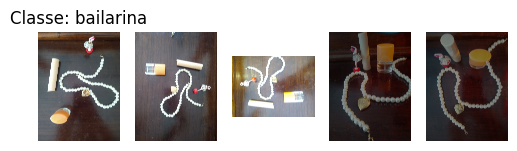

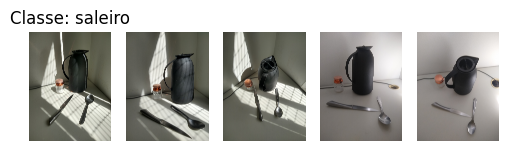

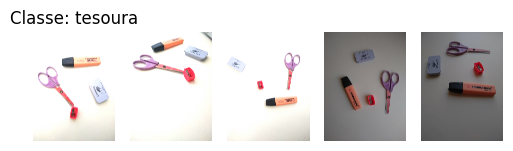

In [23]:
max_images_per_class = 5
batch_size = 5  # Número de imagens para processar e exibir de cada vez


subplot_size = (5, 5)  # Tamanho da figura para cada lote

for classe, fotos in fotos_por_classe.items():
    selected_photos = fotos[:max_images_per_class]

    for i in range(0, len(selected_photos), batch_size):
        plt.figure(figsize=subplot_size)

        for j, photo_name in enumerate(selected_photos[i:i+batch_size]):
            img_path = os.path.join(os.getcwd(), photo_name)
            img = mpimg.imread(img_path)
            ax = plt.subplot(1, batch_size, j+1)
            ax.imshow(img, aspect='equal')
            ax.axis('off')
            if i + j == 0:
                ax.set_title(f'Classe: {classe}')

        plt.tight_layout()
        plt.show()
        plt.close()